# Weather EDA – Iteration 1

This notebook corresponds to the **first iteration** of the project.

Dataset characteristics:
- ~180 days of daily weather data
- Limited to basic atmospheric variables
- Focused on exploratory analysis and initial feature engineering

The goal of this iteration is to:
- Understand temperature dynamics
- Identify seasonality and short-term dependencies
- Define a baseline feature set

Further iterations will expand the dataset with additional atmospheric variables.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Imports OK")

Imports OK


In [13]:
# Load weather dataset
df = pd.read_csv("../data/raw/weather_history_180d.csv")

# Parse date column and set it as index
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df.set_index("date", inplace=True)

#show examples
df.head()



,temp_max_c,temp_min_c,humidity_avg,precip_mm,pressure_mb
date,,,,,
2025-07-26,10.7,6.3,75,0.00,1022.04
2025-07-27,13.4,7.4,68,0.03,1022.83
2025-07-28,14.1,6.7,76,0.09,1027.21
2025-07-29,14.9,7.3,76,0.00,1024.79
2025-07-30,17.4,8.5,67,0.00,1018.67


In [ ]:
df.info() #general structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          180 non-null    object 
 1   temp_max_c    180 non-null    float64
 2   temp_min_c    180 non-null    float64
 3   humidity_avg  180 non-null    int64  
 4   precip_mm     180 non-null    float64
 5   pressure_mb   180 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.6+ KB


In [8]:
df.describe() #basic stadistics


,temp_max_c,temp_min_c,humidity_avg,precip_mm,pressure_mb
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,24.371667,14.003889,61.177778,2.682889,1015.101222
std,7.589336,5.124248,15.795182,9.912147,7.351581
min,10.500000,3.800000,23.000000,0.000000,999.330000
25%,18.300000,10.100000,49.000000,0.000000,1008.770000
50%,23.250000,13.750000,61.000000,0.000000,1014.310000
75%,29.950000,17.750000,71.000000,0.325000,1020.855000
max,43.900000,28.500000,97.000000,82.300000,1032.830000


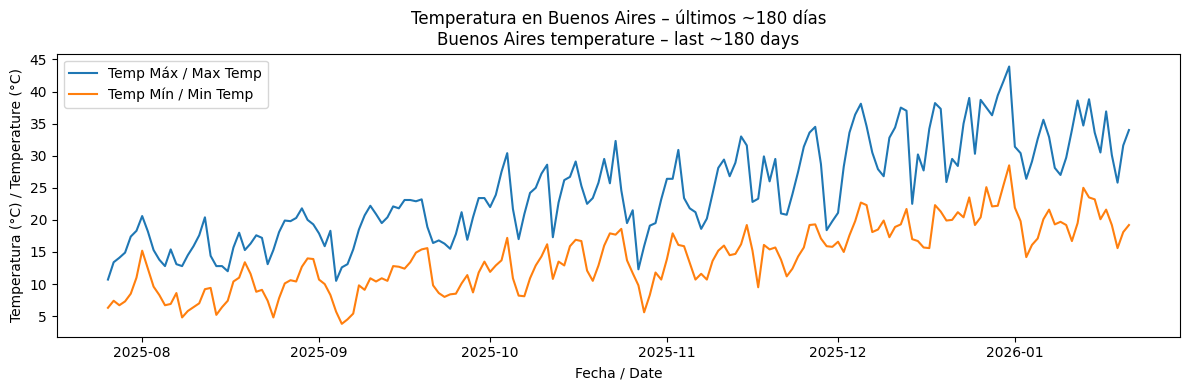

In [12]:
plt.figure(figsize=(12,4))

plt.plot(df.index, df["temp_max_c"], label="Temp Máx / Max Temp")
plt.plot(df.index, df["temp_min_c"], label="Temp Mín / Min Temp")

plt.title("Temperatura en Buenos Aires – últimos ~180 días\n"
          "Buenos Aires temperature – last ~180 days")

plt.xlabel("Fecha / Date")
plt.ylabel("Temperatura (°C) / Temperature (°C)")

plt.legend()
plt.tight_layout()
plt.show()



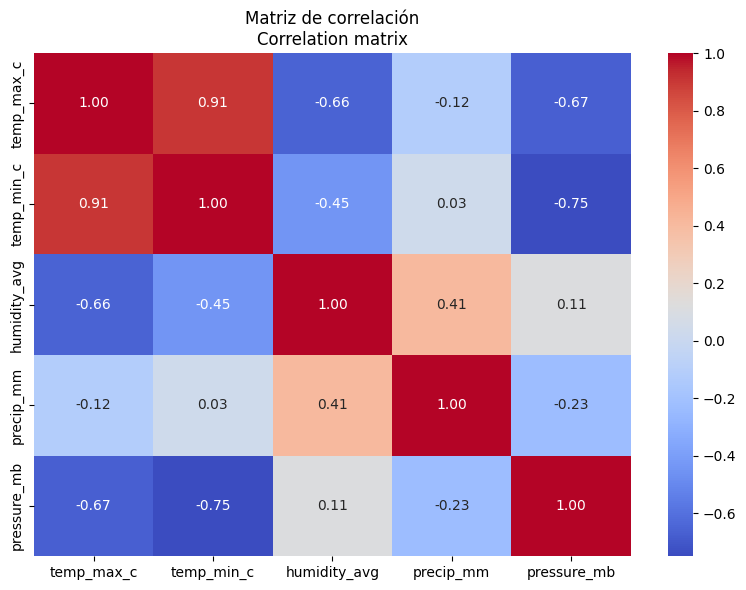

In [14]:
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Matriz de correlación\nCorrelation matrix")

plt.tight_layout()
plt.show()



In [15]:
# Ensure datetime index is properly set
df = df.copy()
df.index = pd.to_datetime(df.index)
df = df.sort_index()


In [16]:
# Calendar-based features
df["day_of_year"] = df.index.dayofyear
df["week_of_year"] = df.index.isocalendar().week.astype(int)
df["month"] = df.index.month


In [17]:
# Lag features for maximum temperature
df["temp_max_lag_1"] = df["temp_max_c"].shift(1)
df["temp_max_lag_3"] = df["temp_max_c"].shift(3)
df["temp_max_lag_7"] = df["temp_max_c"].shift(7)


In [18]:
# Rolling window features
df["temp_max_roll_3"] = df["temp_max_c"].rolling(window=3).mean()
df["temp_max_roll_7"] = df["temp_max_c"].rolling(window=7).mean()


In [19]:
# Auxiliary weather features
feature_cols = [
    "humidity_avg",
    "pressure_mb",
    "precip_mm"
]


In [22]:
# Drop rows with missing values generated by lags/rolling
df_fe = df.dropna().copy()
df_fe.head()


,temp_max_c,temp_min_c,humidity_avg,precip_mm,pressure_mb,day_of_year,week_of_year,month,temp_max_lag_1,temp_max_lag_3,temp_max_lag_7,temp_max_roll_3,temp_max_roll_7
date,,,,,,,,,,,,,
2025-08-02,18.2,12.4,82,0.0,1011.50,214,31,8,20.6,17.4,10.7,19.033333,16.700000
2025-08-03,15.3,9.6,55,0.0,1022.46,215,31,8,18.2,18.3,13.4,18.033333,16.971429
2025-08-04,13.8,8.3,50,0.0,1029.21,216,32,8,15.3,20.6,14.1,15.766667,16.928571
2025-08-05,12.8,6.7,70,0.0,1030.25,217,32,8,13.8,18.2,14.9,13.966667,16.628571
2025-08-06,15.4,6.9,65,0.0,1024.04,218,32,8,12.8,15.3,17.4,14.000000,16.342857


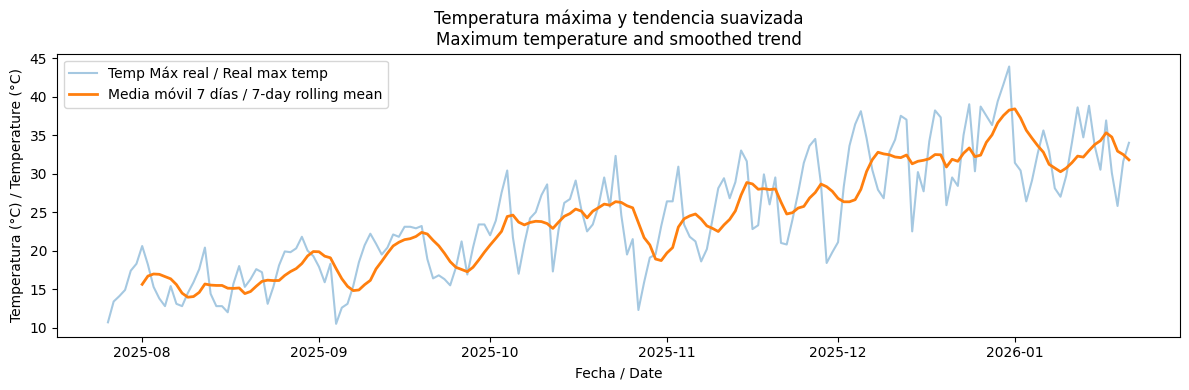

In [23]:
#Visual sanity check (rolling vs real)
plt.figure(figsize=(12,4))

plt.plot(df.index, df["temp_max_c"], alpha=0.4, label="Temp Máx real / Real max temp")
plt.plot(df.index, df["temp_max_roll_7"], linewidth=2, label="Media móvil 7 días / 7-day rolling mean")

plt.title("Temperatura máxima y tendencia suavizada\n"
          "Maximum temperature and smoothed trend")

plt.xlabel("Fecha / Date")
plt.ylabel("Temperatura (°C) / Temperature (°C)")

plt.legend()
plt.tight_layout()
plt.show()


EN: The rolling mean highlights a strong seasonal upward trend, while daily values fluctuate around it.
This shows that temperature dynamics combine a long-term seasonal component with short-term variability, which motivates the use of lagged features and rolling statistics.

ES: La media móvil permite separar la tendencia estacional del ruido diario, lo que justifica el uso de lags y estadísticas móviles para modelar la temperatura.

In [24]:
target = "temp_max_c"

# Correlation of features with target
corr_with_target = (
    df_fe
    .corr()[target]
    .sort_values(ascending=False)
)

corr_with_target


temp_max_c         1.000000
temp_max_roll_3    0.919500
temp_min_c         0.905077
temp_max_lag_1     0.847991
temp_max_roll_7    0.836972
temp_max_lag_7     0.684658
temp_max_lag_3     0.641291
day_of_year       -0.022367
month             -0.028583
precip_mm         -0.131977
week_of_year      -0.156263
humidity_avg      -0.653997
pressure_mb       -0.668748
Name: temp_max_c, dtype: float64

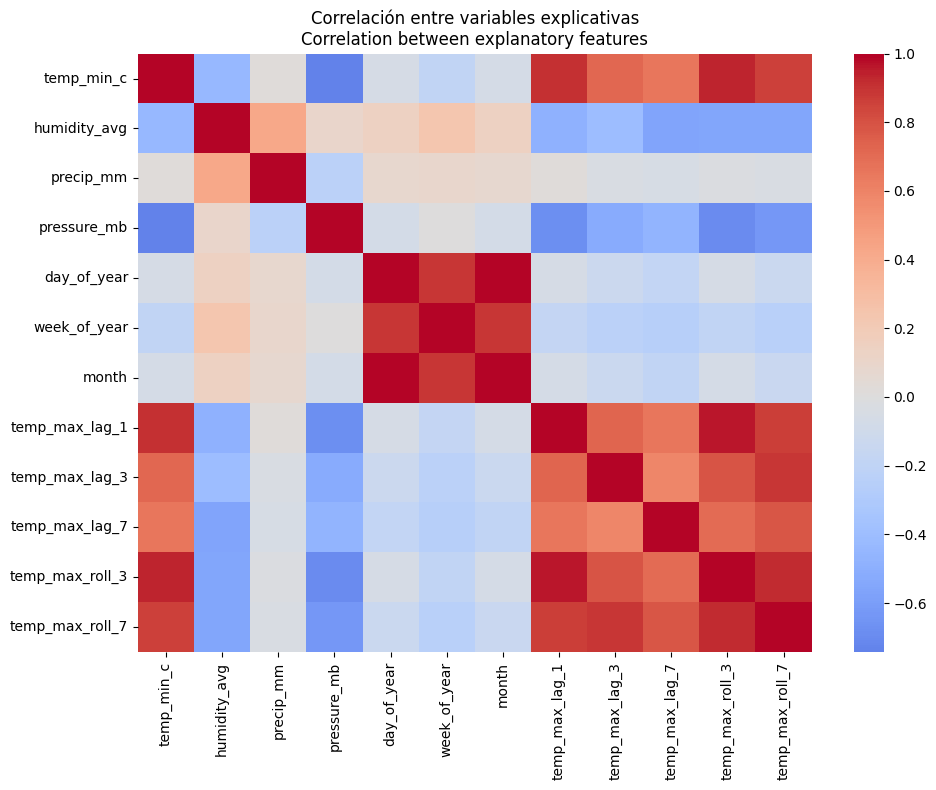

In [25]:
plt.figure(figsize=(10,8))

sns.heatmap(
    df_fe.drop(columns=[target]).corr(),
    cmap="coolwarm",
    center=0
)

plt.title(
    "Correlación entre variables explicativas\n"
    "Correlation between explanatory features"
)

plt.tight_layout()
plt.show()


In [26]:
selected_features = [
    # Temporal structure
    "day_of_year",
    "week_of_year",

    # Memory
    "temp_max_lag_1",
    "temp_max_lag_7",
    "temp_max_roll_7",

    # Atmospheric context
    "humidity_avg",
    "pressure_mb"
]


In [27]:
X = df_fe[selected_features]
y = df_fe[target]

X.head()


,day_of_year,week_of_year,temp_max_lag_1,temp_max_lag_7,temp_max_roll_7,humidity_avg,pressure_mb
date,,,,,,,
2025-08-02,214,31,20.6,10.7,16.700000,82,1011.50
2025-08-03,215,31,18.2,13.4,16.971429,55,1022.46
2025-08-04,216,32,15.3,14.1,16.928571,50,1029.21
2025-08-05,217,32,13.8,14.9,16.628571,70,1030.25
2025-08-06,218,32,12.8,17.4,16.342857,65,1024.04
